# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('busiest_airport_airline_delays.csv')

# Preprocessing

In [3]:
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,19,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
1,3,0,3,MORNING,1,229,120,United Air Lines Inc.,32102,48104,...,22,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
2,3,0,9,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,24,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
3,3,0,1,EARLY_MORNING,1,4,128,American Airlines Inc.,32102,75591,...,20,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
4,3,0,2,MORNING,1,229,50,SkyWest Airlines Inc.,32102,69699,...,21,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47


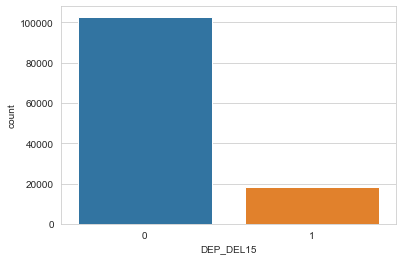

In [4]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [5]:
data = data.drop_duplicates()
data = data.drop(columns=['DEPARTING_AIRPORT', 'CARRIER_NAME'])
data = data.drop(columns=['LATITUDE','LONGITUDE'])
data = data.drop(columns=['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS'])
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,MORNING,1,32102,48104,361,816174,1539321,0.001402,0.001265,19,NONE,0.0,0.0,0.0,72.0,4.47
1,3,0,3,MORNING,1,32102,48104,361,816174,1539321,0.001402,0.001265,22,NONE,0.0,0.0,0.0,72.0,4.47
2,3,0,9,MORNING,1,32102,48104,361,816174,1539321,0.001402,0.001265,24,NONE,0.0,0.0,0.0,72.0,4.47
3,3,0,1,EARLY_MORNING,1,32102,75591,892,816174,2286836,0.000504,0.000911,20,NONE,0.0,0.0,0.0,72.0,4.47
4,3,0,2,MORNING,1,32102,69699,2048,816174,698248,0.000170,0.000492,21,NONE,0.0,0.0,0.0,72.0,4.47


## Handling Categorical Data

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['DEP_BLOCK']= label_encoder.fit_transform(data['DEP_BLOCK'])
data['PREVIOUS_AIRPORT']= label_encoder.fit_transform(data['PREVIOUS_AIRPORT'])

In [7]:
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,19,178,0.0,0.0,0.0,72.0,4.47
1,3,0,3,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,22,178,0.0,0.0,0.0,72.0,4.47
2,3,0,9,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,24,178,0.0,0.0,0.0,72.0,4.47
3,3,0,1,1,1,32102,75591,892,816174,2286836,0.000504,0.000911,20,178,0.0,0.0,0.0,72.0,4.47
4,3,0,2,5,1,32102,69699,2048,816174,698248,0.000170,0.000492,21,178,0.0,0.0,0.0,72.0,4.47


# Transform Data

## Split Data

In [8]:
# data_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# data_target yang khusus hanya akan berisi label/kelas/target 
df_feat = data.drop('DEP_DEL15',axis=1) 
df_feat.head()

,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,19,178,0.0,0.0,0.0,72.0,4.47
1,3,3,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,22,178,0.0,0.0,0.0,72.0,4.47
2,3,9,5,1,32102,48104,361,816174,1539321,0.001402,0.001265,24,178,0.0,0.0,0.0,72.0,4.47
3,3,1,1,1,32102,75591,892,816174,2286836,0.000504,0.000911,20,178,0.0,0.0,0.0,72.0,4.47
4,3,2,5,1,32102,69699,2048,816174,698248,0.000170,0.000492,21,178,0.0,0.0,0.0,72.0,4.47


In [9]:
df_target = data['DEP_DEL15'] 
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: DEP_DEL15, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  83811  | Jumlah Test Data :  35920


## Oversampling Data

In [11]:
oversample = imblearn.over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

0    71137
1    71137
Name: DEP_DEL15, dtype: int64

## Standardized Data

In [12]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()
X_train_scaled = StdScaler.fit_transform(X_train)
X_test_scaled = StdScaler.transform(X_test)
X_test_scaled

array([[ 0.60476689,  0.98335588, -1.37318497, ..., -0.33426595,
         0.30470673,  1.87160876],
       [ 0.055153  , -1.23962332, -1.37318497, ..., -0.33426595,
        -0.03537887, -0.91296261],
       [ 0.055153  ,  0.42761108,  0.35527089, ..., -0.33426595,
        -0.12040028, -0.64903625],
       ...,
       [ 1.70399467, -1.23962332,  1.5075748 , ..., -0.33426595,
         0.38972813,  0.3473599 ],
       [ 0.60476689, -1.23962332, -0.22088106, ..., -0.33426595,
         0.30470673, -0.98116829],
       [-1.04407479, -0.68387852, -1.37318497, ..., -0.33426595,
        -0.88559288,  0.27915421]])

# Modelling

## Linear Regression

In [13]:
LinRmodel = LinearRegression()
LinRmodel.fit(X_train, y_train)
y_pred = LinRmodel.predict(X_test)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
accuracy_score(y_test,y_pred)

0.6290924276169265

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     30535
           1       0.20      0.49      0.29      5385

    accuracy                           0.63     35920
   macro avg       0.54      0.57      0.52     35920
weighted avg       0.78      0.63      0.68     35920



## Logistic Regression

In [15]:
LogRModel = LogisticRegression()
LogRModel.fit(X_train, y_train)
y_pred = LogRModel.predict_proba(X_test)[:,1]
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
accuracy_score(y_test, y_pred)

0.4904788418708241

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.48      0.61     30535
           1       0.16      0.56      0.25      5385

    accuracy                           0.49     35920
   macro avg       0.51      0.52      0.43     35920
weighted avg       0.76      0.49      0.56     35920

